# LASSO & R REDGE REGRESSION

## Importing Libraries

In [79]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
import warnings
warnings.filterwarnings('ignore')

## IMPORTING DATASET

In [80]:
data=pd.read_csv("train.csv")
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [81]:
data.shape

(1460, 81)

### DATA INSIGHTS

In [82]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [83]:
data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [84]:
data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [85]:
data["Age_year_built"]=data.YearBuilt.max()-data.YearBuilt
data["Age_Year_Remod_Add"]=data.YearRemodAdd.max()-data.YearRemodAdd
data['AgeGarageYrBlt'] = data.GarageYrBlt.max() - data.GarageYrBlt
data['AgeYrSold'] = data.YrSold.max() - data.YrSold

In [86]:
data.drop(['YearBuilt','YearRemodAdd','GarageYrBlt','YrSold'],axis=1,inplace=True)

In [87]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,MiscFeature,MiscVal,MoSold,SaleType,SaleCondition,SalePrice,Age_year_built,Age_Year_Remod_Add,AgeGarageYrBlt,AgeYrSold
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,NaN,0,2,WD,Normal,208500,7,7,7.0,2
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,NaN,0,5,WD,Normal,181500,34,34,34.0,3
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,NaN,0,9,WD,Normal,223500,9,8,9.0,2
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,NaN,0,2,WD,Abnorml,140000,95,40,12.0,4
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,NaN,0,12,WD,Normal,250000,10,10,10.0,2


In [88]:
data.shape

(1460, 81)

## NULL DATA

In [89]:
data.isnull().sum()

Id                      0
MSSubClass              0
MSZoning                0
LotFrontage           259
LotArea                 0
                     ... 
SalePrice               0
Age_year_built          0
Age_Year_Remod_Add      0
AgeGarageYrBlt         81
AgeYrSold               0
Length: 81, dtype: int64

In [90]:
data[['Age_Year_Remod_Add','Age_year_built','AgeGarageYrBlt', 'AgeYrSold']].head()

,Age_Year_Remod_Add,Age_year_built,AgeGarageYrBlt,AgeYrSold
0,7,7,7.0,2
1,34,34,34.0,3
2,8,9,9.0,2
3,40,95,12.0,4
4,10,10,10.0,2


## DROPING UNECESSARY COLUMNS

In [91]:
data.drop(['PoolQC','MiscFeature','Alley','Fence','FireplaceQu'],axis=1,inplace=True)

In [92]:
data.drop(['Id'], axis=1, inplace=True)

In [93]:
round(100*(data.isnull().sum()/len(data.index)), 2)[round(data.isnull().sum()/len(data.index), 2).values > 0.00].sort_values(ascending=False)

LotFrontage       17.74
GarageType         5.55
GarageFinish       5.55
GarageQual         5.55
GarageCond         5.55
AgeGarageYrBlt     5.55
BsmtExposure       2.60
BsmtFinType2       2.60
BsmtQual           2.53
BsmtCond           2.53
BsmtFinType1       2.53
MasVnrType         0.55
MasVnrArea         0.55
dtype: float64

In [94]:
data.describe(percentiles = [0.05, 0.1, 0.25, 0.5, 0.75, 0.90, 0.95, 0.99, 1])

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,Age_year_built,Age_Year_Remod_Add,AgeGarageYrBlt,AgeYrSold
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,103.685262,443.639726,46.549315,567.240411,1057.429452,...,3.409589,15.060959,2.758904,43.489041,6.321918,180921.195890,38.732192,25.134247,31.493836,2.184247
std,42.300571,24.284752,9981.264932,1.382997,1.112799,181.066207,456.098091,161.319273,441.866955,438.705324,...,29.317331,55.757415,40.177307,496.123024,2.703626,79442.502883,30.202904,20.645407,24.689725,1.328095
min,20.000000,21.000000,1300.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,34900.000000,0.000000,0.000000,0.000000,0.000000
5%,20.000000,34.000000,3311.700000,4.000000,4.000000,0.000000,0.000000,0.000000,0.000000,519.300000,...,0.000000,0.000000,0.000000,0.000000,2.000000,88000.000000,3.000000,3.000000,3.000000,0.000000
10%,20.000000,44.000000,5000.000000,5.000000,5.000000,0.000000,0.000000,0.000000,74.900000,636.900000,...,0.000000,0.000000,0.000000,0.000000,3.000000,106475.000000,4.000000,4.000000,4.000000,0.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,0.000000,0.000000,0.000000,223.000000,795.750000,...,0.000000,0.000000,0.000000,0.000000,5.000000,129975.000000,10.000000,6.000000,8.000000,1.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,0.000000,383.500000,0.000000,477.500000,991.500000,...,0.000000,0.000000,0.000000,0.000000,6.000000,163000.000000,37.000000,16.000000,30.000000,2.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,...,0.000000,0.000000,0.000000,0.000000,8.000000,214000.000000,56.000000,43.000000,49.000000,3.000000
90%,120.000000,96.000000,14381.700000,8.000000,7.000000,335.000000,1065.500000,117.200000,1232.000000,1602.200000,...,0.000000,0.000000,0.000000,0.000000,10.000000,278000.000000,85.100000,60.000000,65.000000,4.000000


## CHANGING DATATYPE

In [95]:
data['MoSold'] = data['MoSold'].astype('object')
data['OverallQual'] = data['OverallQual'].astype('object')
data['OverallCond'] = data['OverallCond'].astype('object')
data['BsmtFullBath'] = data['BsmtFullBath'].astype('object')
data['BsmtHalfBath'] = data['BsmtHalfBath'].astype('object')
data['FullBath'] = data['FullBath'].astype('object')
data['HalfBath'] = data['HalfBath'].astype('object')
data['BedroomAbvGr'] = data['BedroomAbvGr'].astype('object')
data['KitchenAbvGr'] = data['KitchenAbvGr'].astype('object')
data['TotRmsAbvGrd'] = data['TotRmsAbvGrd'].astype('object')
data['Fireplaces'] = data['Fireplaces'].astype('object')
data['GarageCars'] = data['GarageCars'].astype('object')

In [96]:
data.dtypes

MSSubClass              int64
MSZoning               object
LotFrontage           float64
LotArea                 int64
Street                 object
                       ...   
SalePrice               int64
Age_year_built          int64
Age_Year_Remod_Add      int64
AgeGarageYrBlt        float64
AgeYrSold               int64
Length: 75, dtype: object

## CHECKING FOR OUTLIEARS

In [97]:
out_col = [
    'LotArea',
    'TotalBsmtSF',
    'PoolArea',
    'MiscVal']

In [98]:
def box_ploting(x,fig):
    plt.figure(figsize=(10,8))
    plt.subplot(2,2,fig)
    sns.boxplot(data=data,x=x)
    plt.title(x +' plot')
    plt.xlabel(x)
    plt.show()

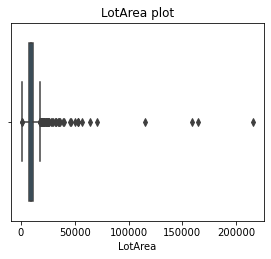

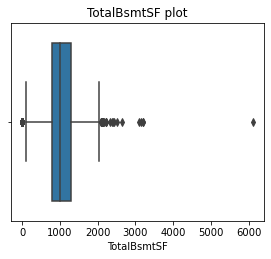

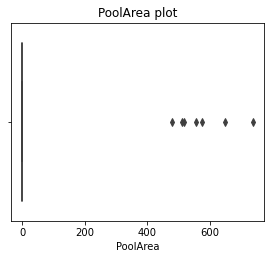

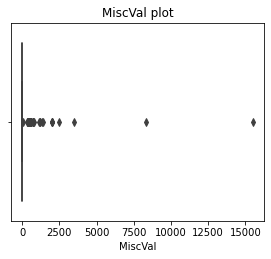

In [99]:
box_ploting('LotArea',1)
box_ploting('TotalBsmtSF',2)
box_ploting('PoolArea',1)
box_ploting('MiscVal',2)

In [100]:
data.shape

(1460, 75)

## FUNCTION FOR REMOVING OUTLIEARS

In [101]:
def remove_outliers(x, num_cols, s_quntl=0.05, e_quntl=0.95):
    for col in num_cols:
        Q1 = x[col].quantile(s_quntl)
        Q3 = x[col].quantile(e_quntl)
        IQR = Q3-Q1
        x =  x[(x[col] >= (Q1-(1.5*IQR))) & (x[col] <= (Q3+(1.5*IQR)))] 
    return x 

In [102]:
data=remove_outliers(data,out_col)
data

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,PoolArea,MiscVal,MoSold,SaleType,SaleCondition,SalePrice,Age_year_built,Age_Year_Remod_Add,AgeGarageYrBlt,AgeYrSold
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,2,WD,Normal,208500,7,7,7.0,2
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,5,WD,Normal,181500,34,34,34.0,3
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,9,WD,Normal,223500,9,8,9.0,2
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,0,0,2,WD,Abnorml,140000,95,40,12.0,4
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,12,WD,Normal,250000,10,10,10.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,20,FV,62.0,7500,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,10,WD,Normal,185000,6,5,6.0,1
1455,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,8,WD,Normal,175000,11,10,11.0,3
1456,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,2,WD,Normal,210000,32,22,32.0,0
1458,20,RL,68.0,9717,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,4,WD,Normal,142125,60,14,60.0,0


In [103]:
data.shape

(1390, 75)

In [104]:
null_col=data.columns[round(data.isnull().sum()/len(data.index), 2).values > 0.00]
null_col

Index(['LotFrontage', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'GarageType',
       'GarageFinish', 'GarageQual', 'GarageCond', 'AgeGarageYrBlt'],
      dtype='object')

In [105]:
data[null_col].describe(percentiles = [0.05, 0.1, 0.25, 0.5, 0.75, 0.90, 0.95, 0.99])

,LotFrontage,MasVnrArea,AgeGarageYrBlt
count,1151.000000,1382.000000,1312.000000
mean,69.527368,104.463097,31.167683
std,23.064916,180.816155,24.746420
min,21.000000,0.000000,0.000000
5%,34.000000,0.000000,3.000000
10%,43.000000,0.000000,4.000000
25%,59.000000,0.000000,8.000000
50%,69.000000,0.000000,30.000000
75%,80.000000,167.750000,48.000000
90%,95.000000,334.800000,65.000000


## FILLING MISSING VALUES

In [106]:
#def filling_missing_values(x):
    #data[x].fillna(data[x].mean(),inplace=True)
    
for col in null_col:
    if col not in ['LotFrontage', 'AgeGarageYrBlt', 'MasVnrArea']:
        filling_missing_values(null_col)

        
        
filling_missing_values('LotFrontage') 
filling_missing_values('MasVnrArea') 
filling_missing_values('AgeGarageYrBlt')

In [107]:
data.isnull().sum()

MSSubClass            0
MSZoning              0
LotFrontage           0
LotArea               0
Street                0
                     ..
SalePrice             0
Age_year_built        0
Age_Year_Remod_Add    0
AgeGarageYrBlt        0
AgeYrSold             0
Length: 75, dtype: int64

In [108]:
num_data=data.select_dtypes(include=['int64', 'float']).columns
num_data

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'SalePrice', 'Age_year_built', 'Age_Year_Remod_Add', 'AgeGarageYrBlt',
       'AgeYrSold'],
      dtype='object')

##  HANDLING DUPLICATE VALUES

In [109]:
def duplicate_value(num_data):
    x=[]
    for col in (num_data):
         if (data[col].value_counts().max()/data.shape[0] > 0.90):
                x.append(col)
    return x        
    

In [110]:
filter_col=duplicate_value(num_data)
filter_col

['LowQualFinSF', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal']

In [111]:
data.drop(filter_col,axis = 1, inplace = True)

In [112]:
data.shape

(1390, 70)

## VISUALIZATING PLOTS

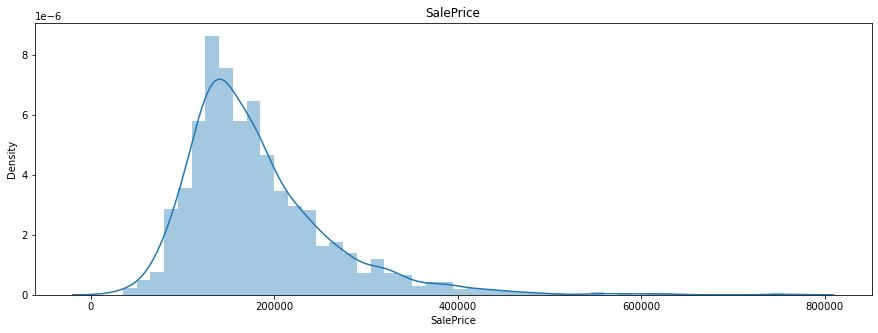

In [113]:
plt.figure(figsize=(15,5))
plt.title('SalePrice')
sns.distplot(data.SalePrice)
plt.show()

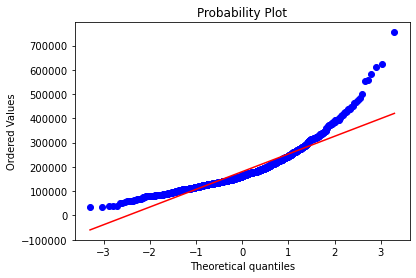

In [114]:
from scipy import stats
stats.probplot(data['SalePrice'], plot=plt)
plt.show()

In [115]:
def categorical_data(cols):
    for col in cols:
        print('\n')
        print('---------------------------------------------- ',col,' -----------------------------------------------')
        print(data[col].astype('category').value_counts())
        f, (ax1) = plt.subplots(nrows=1, ncols=1, figsize=(12,3), dpi=90) 
        sns.countplot(data=data, x=col, order=data[col].value_counts().index, ax=ax1) 
        ax1.set_ylabel('Count') 
        ax1.set_title(f'{col}', weight="bold") 
        ax1.set_xlabel(col) 
        if col == 'Neighborhood':
            xticks(rotation = 90)
        plt.show()



----------------------------------------------  MSZoning  -----------------------------------------------
RL         1090
RM          211
FV           65
RH           16
C (all)       8
Name: MSZoning, dtype: int64


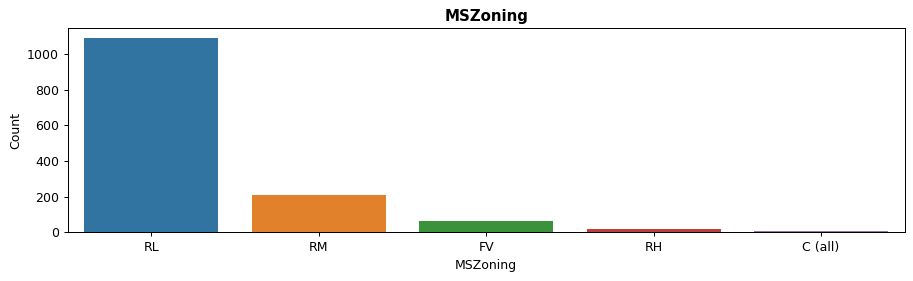



----------------------------------------------  Street  -----------------------------------------------
Pave    1387
Grvl       3
Name: Street, dtype: int64


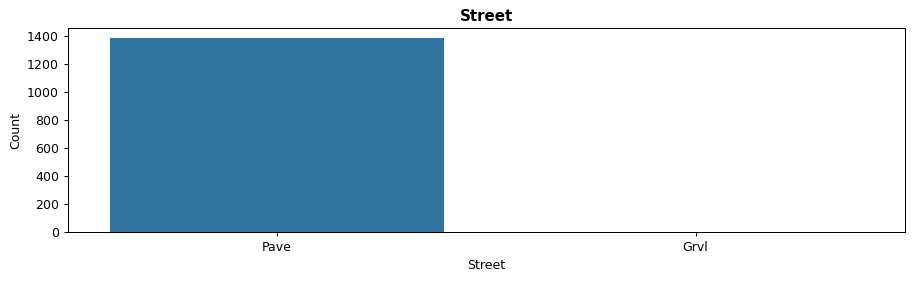



----------------------------------------------  LotShape  -----------------------------------------------
Reg    892
IR1    456
IR2     34
IR3      8
Name: LotShape, dtype: int64


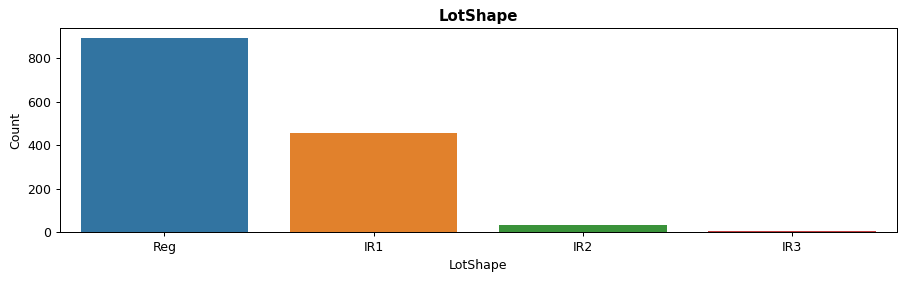



----------------------------------------------  LandContour  -----------------------------------------------
Lvl    1258
Bnk      58
HLS      47
Low      27
Name: LandContour, dtype: int64


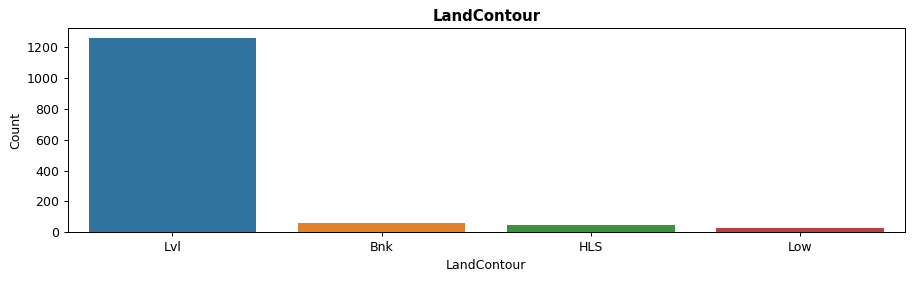



----------------------------------------------  Utilities  -----------------------------------------------
AllPub    1389
NoSeWa       1
Name: Utilities, dtype: int64


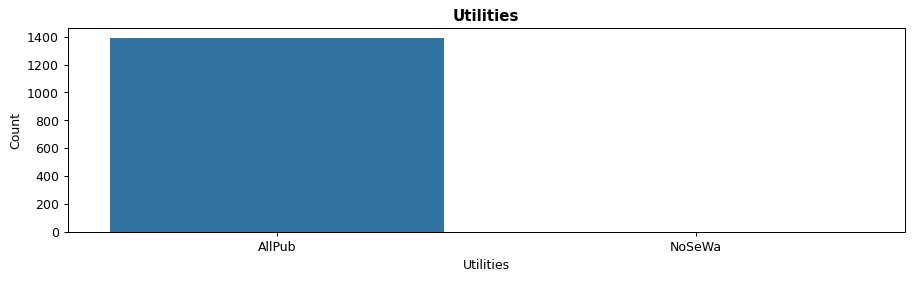



----------------------------------------------  LotConfig  -----------------------------------------------
Inside     1009
Corner      247
CulDSac      85
FR2          45
FR3           4
Name: LotConfig, dtype: int64


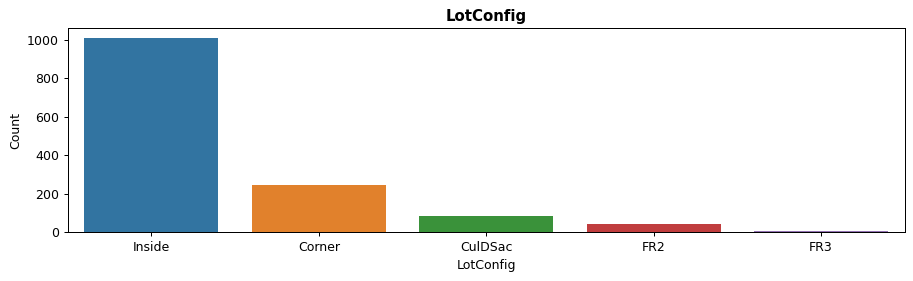



----------------------------------------------  LandSlope  -----------------------------------------------
Gtl    1325
Mod      58
Sev       7
Name: LandSlope, dtype: int64


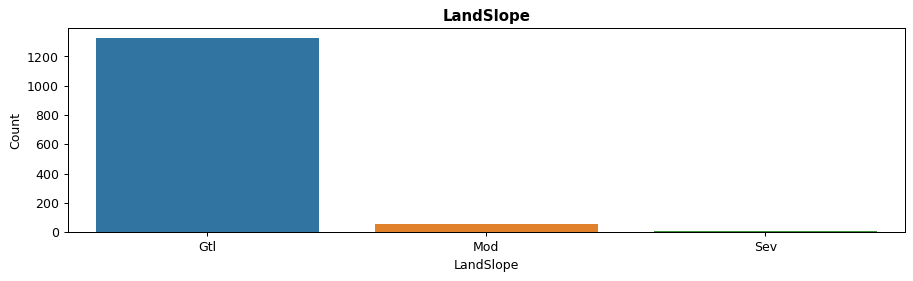



----------------------------------------------  Neighborhood  -----------------------------------------------
NAmes      211
CollgCr    148
OldTown    108
Edwards     94
Somerst     86
NridgHt     77
Gilbert     76
Sawyer      69
NWAmes      67
SawyerW     58
BrkSide     54
Crawfor     50
Mitchel     44
NoRidge     39
Timber      35
IDOTRR      34
SWISU       25
StoneBr     24
ClearCr     20
Blmngtn     17
MeadowV     17
BrDale      16
Veenker     10
NPkVill      9
Blueste      2
Name: Neighborhood, dtype: int64


NameError: name 'xticks' is not defined

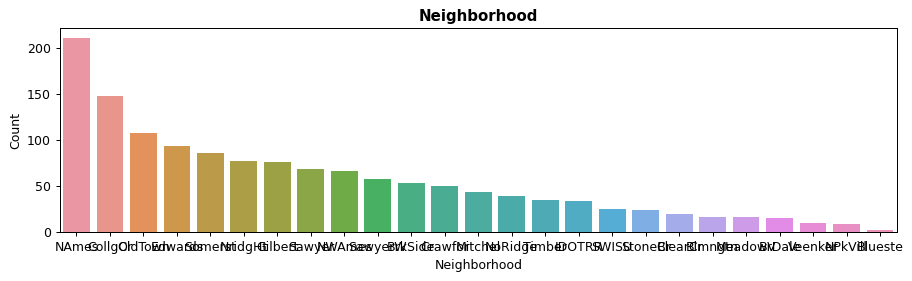

In [116]:
categ_var = data.select_dtypes(include=['object']).columns
categorical_data(categ_var)

In [144]:
data.drop(['Street','Utilities'],axis=1,inplace=True)

In [145]:
def numerical_data(cols):
    int_range = range(len(cols))[::3]
    col_length = len(cols)
    for col in int_range:
        print('------------------ ',cols[col:col+3],' ---------------------')
        sns.pairplot(data, x_vars=cols[col:col+3], y_vars='SalePrice',height=3, aspect=1,kind='scatter')            
        plt.show()

In [146]:
num_cols=data.select_dtypes(include=['int64', 'float']).columns
num_cols

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'GrLivArea', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch',
       'SalePrice', 'Age_year_built', 'Age_Year_Remod_Add', 'AgeGarageYrBlt',
       'AgeYrSold'],
      dtype='object')

## VISUALIZATING NUMERIC DATA

In [147]:
num_cols = num_cols.drop(labels='SalePrice')
num_cols

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'GrLivArea', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch',
       'Age_year_built', 'Age_Year_Remod_Add', 'AgeGarageYrBlt', 'AgeYrSold'],
      dtype='object')

------------------  Index(['MSSubClass', 'LotFrontage', 'LotArea'], dtype='object')  ---------------------


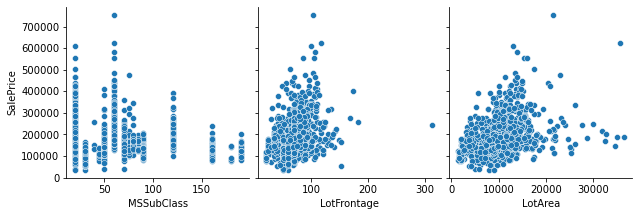

------------------  Index(['MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2'], dtype='object')  ---------------------


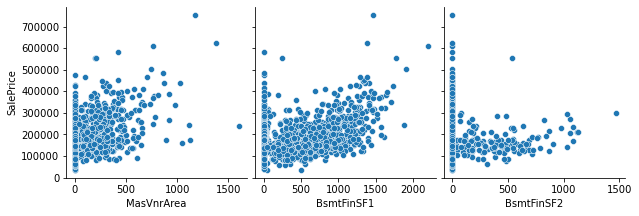

------------------  Index(['BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF'], dtype='object')  ---------------------


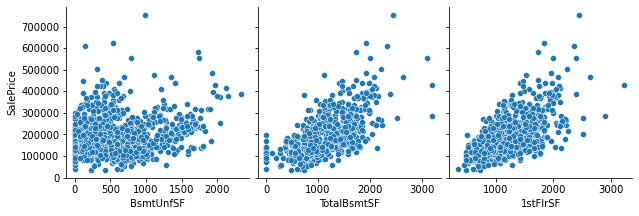

------------------  Index(['2ndFlrSF', 'GrLivArea', 'GarageArea'], dtype='object')  ---------------------


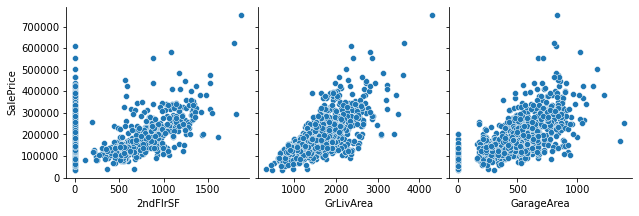

------------------  Index(['WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch'], dtype='object')  ---------------------


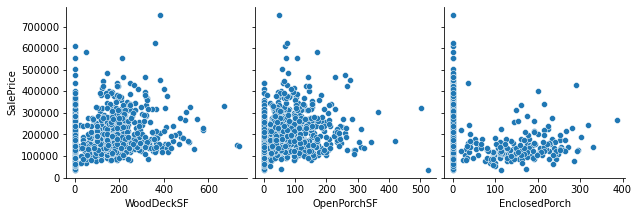

------------------  Index(['Age_year_built', 'Age_Year_Remod_Add', 'AgeGarageYrBlt'], dtype='object')  ---------------------


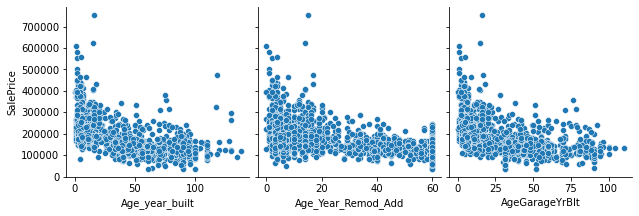

------------------  Index(['AgeYrSold'], dtype='object')  ---------------------


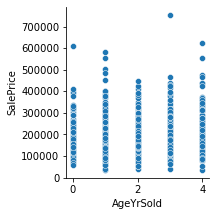

In [148]:
numerical_data(num_cols)

## CORRELATION 

In [149]:
data.corr()

,MSSubClass,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,SalePrice,Age_year_built,Age_Year_Remod_Add,AgeGarageYrBlt,AgeYrSold
MSSubClass,1.000000,-0.388711,-0.342968,0.022579,-0.075767,-0.062261,-0.144766,-0.259217,-0.266408,0.306273,0.070840,-0.102716,-0.021872,-0.009711,-0.013740,-0.090796,-0.022833,-0.038622,-0.075703,0.024746
LotFrontage,-0.388711,1.000000,0.529785,0.167115,0.121164,0.034028,0.143064,0.293688,0.366273,0.048259,0.317353,0.301772,0.083781,0.117221,-0.015761,0.353014,-0.118829,-0.080633,-0.065844,-0.011999
LotArea,-0.342968,0.529785,1.000000,0.159315,0.191532,0.065029,0.083374,0.314501,0.411500,0.097421,0.393422,0.315244,0.170396,0.143492,-0.013114,0.388366,-0.049302,-0.023382,-0.007326,0.039214
MasVnrArea,0.022579,0.167115,0.159315,1.000000,0.235270,-0.072487,0.116509,0.342517,0.323661,0.166790,0.379727,0.367629,0.166599,0.106900,-0.112818,0.492188,-0.308671,-0.169883,-0.245845,0.007854
BsmtFinSF1,-0.075767,0.121164,0.191532,0.235270,1.000000,-0.060306,-0.524818,0.450870,0.382088,-0.189560,0.114381,0.264193,0.186892,0.073598,-0.124671,0.386088,-0.249066,-0.121937,-0.150172,-0.016740
BsmtFinSF2,-0.062261,0.034028,0.065029,-0.072487,-0.060306,1.000000,-0.203792,0.104622,0.093877,-0.102888,-0.017668,-0.021975,0.078956,0.007503,0.037454,-0.026123,0.049825,0.072670,0.083520,-0.035074
BsmtUnfSF,-0.144766,0.143064,0.083374,0.116509,-0.524818,-0.203792,1.000000,0.454228,0.344555,0.003653,0.263274,0.194943,0.010003,0.127139,0.006045,0.234136,-0.152745,-0.181831,-0.189311,0.033998
TotalBsmtSF,-0.259217,0.293688,0.314501,0.342517,0.450870,0.104622,0.454228,1.000000,0.805884,-0.233182,0.396352,0.476838,0.235874,0.216723,-0.108711,0.644387,-0.404762,-0.295006,-0.328261,0.005688
1stFlrSF,-0.266408,0.366273,0.411500,0.323661,0.382088,0.093877,0.344555,0.805884,1.000000,-0.251616,0.527843,0.483226,0.228963,0.180636,-0.068399,0.625571,-0.286559,-0.243680,-0.241762,0.002141
2ndFlrSF,0.306273,0.048259,0.097421,0.166790,-0.189560,-0.102888,0.003653,-0.233182,-0.251616,1.000000,0.684007,0.127993,0.080898,0.182089,0.044479,0.301314,-0.000132,-0.130469,-0.066878,0.033349


<AxesSubplot:>

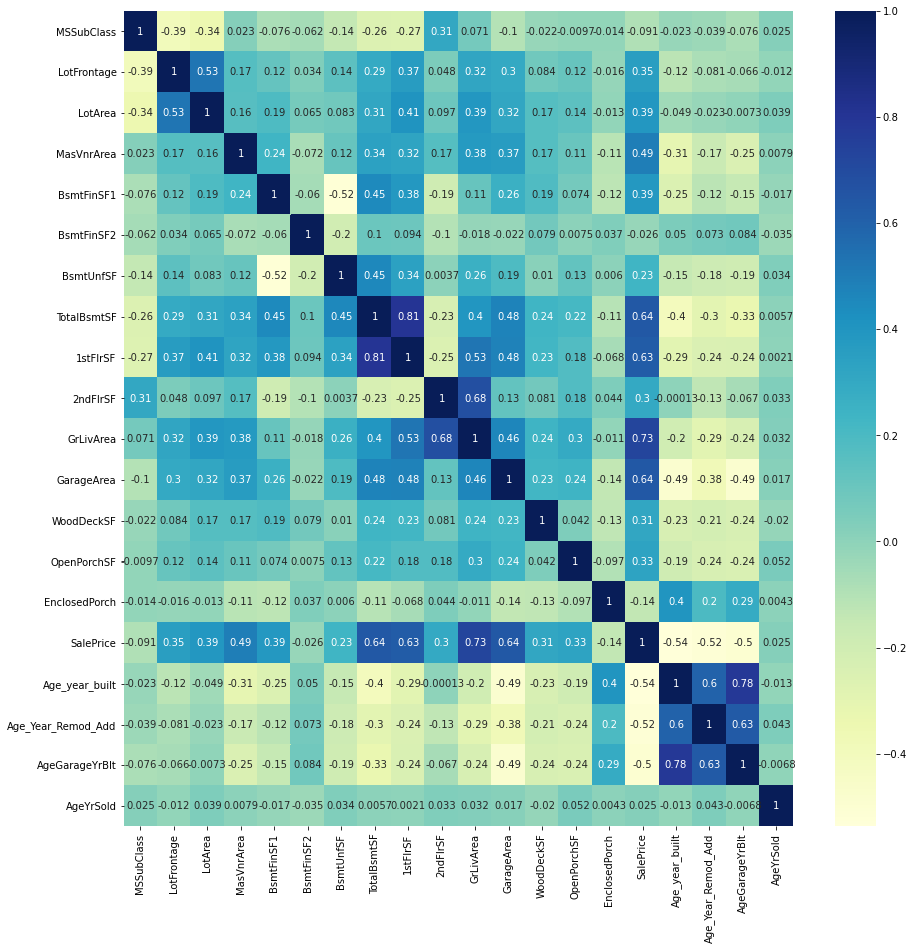

In [150]:
plt.figure(figsize=(15,15))
sns.heatmap(data.corr(), annot=True, cmap ="YlGnBu")

## Data preperation

In [151]:
X=data.drop(columns=['SalePrice'])
y=np.log(data['SalePrice'])

In [152]:
categorical_data = X.select_dtypes(include=['object'])
categorical_data.head()

,MSZoning,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,...,Fireplaces,GarageType,GarageFinish,GarageCars,GarageQual,GarageCond,PavedDrive,MoSold,SaleType,SaleCondition
0,RL,Reg,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,...,0,Attchd,RFn,2,TA,TA,Y,2,WD,Normal
1,RL,Reg,Lvl,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,...,1,Attchd,RFn,2,TA,TA,Y,5,WD,Normal
2,RL,IR1,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,...,1,Attchd,RFn,2,TA,TA,Y,9,WD,Normal
3,RL,IR1,Lvl,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,...,1,Detchd,Unf,3,TA,TA,Y,2,WD,Abnorml
4,RL,IR1,Lvl,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,...,1,Attchd,RFn,3,TA,TA,Y,12,WD,Normal


In [153]:
dummies = pd.get_dummies(categorical_data, drop_first=True)
dummies.head(15)

,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,1,0,0,0,1,0,0,1,...,0,0,0,0,1,0,0,0,1,0
1,0,0,1,0,0,0,1,0,0,1,...,0,0,0,0,1,0,0,0,1,0
2,0,0,1,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,1,0
3,0,0,1,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,1,0
6,0,0,1,0,0,0,1,0,0,1,...,0,0,0,0,1,0,0,0,1,0
8,0,0,0,1,0,0,1,0,0,1,...,0,0,0,0,1,0,0,0,0,0
9,0,0,1,0,0,0,1,0,0,1,...,0,0,0,0,1,0,0,0,1,0
10,0,0,1,0,0,0,1,0,0,1,...,0,0,0,0,1,0,0,0,1,0
11,0,0,1,0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,1


In [154]:
X=X.drop(columns=categorical_data)
X.head()

,MSSubClass,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,Age_year_built,Age_Year_Remod_Add,AgeGarageYrBlt,AgeYrSold
0,60,65.0,8450,196.0,706,0,150,856,856,854,1710,548,0,61,0,7,7,7.0,2
1,20,80.0,9600,0.0,978,0,284,1262,1262,0,1262,460,298,0,0,34,34,34.0,3
2,60,68.0,11250,162.0,486,0,434,920,920,866,1786,608,0,42,0,9,8,9.0,2
3,70,60.0,9550,0.0,216,0,540,756,961,756,1717,642,0,35,272,95,40,12.0,4
4,60,84.0,14260,350.0,655,0,490,1145,1145,1053,2198,836,192,84,0,10,10,10.0,2


In [155]:
X=pd.concat([X,dummies],axis=1)
X.head(3)

,MSSubClass,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,196.0,706,0,150,856,856,854,...,0,0,0,0,1,0,0,0,1,0
1,20,80.0,9600,0.0,978,0,284,1262,1262,0,...,0,0,0,0,1,0,0,0,1,0
2,60,68.0,11250,162.0,486,0,434,920,920,866,...,0,0,0,0,1,0,0,0,1,0


## SPLITING TRAIN & TESTING DATA

In [159]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 100)

In [160]:
print(X_train.shape)
print(X_test.shape)

(972, 275)
(417, 275)


## SCALERIZATION

In [161]:
from sklearn.preprocessing import StandardScaler
num_col=X_train.select_dtypes(include=['int64','float64']).columns
scaler = StandardScaler()
X_train[num_col] = scaler.fit_transform(X_train[num_col])
X_test[num_col] = scaler.transform(X_test[num_col])

In [162]:
X_train.head(3)

,MSSubClass,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
167,0.063424,0.782449,0.205331,1.072033,2.026333,-0.302777,-0.621782,1.326713,1.260954,0.513864,...,0,0,1,0,0,0,0,0,0,1
644,-0.879563,0.735215,-0.119696,0.310899,1.632074,-0.302777,0.163669,1.788348,1.688281,-0.802230,...,0,0,1,0,0,0,0,0,0,1
1288,1.477904,-1.390314,-0.952472,-0.582607,1.719425,-0.302777,-0.512132,1.123493,1.395179,-0.802230,...,0,0,0,0,1,0,0,0,1,0


## LINAER REGRESSION

In [164]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [165]:
lr = LinearRegression()

In [168]:
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

In [169]:
mean_squared_error = np.mean((y_pred - y_test)**2)
print("Mean squared Error on test set : ", mean_squared_error)

Mean squared Error on test set :  4.1823849466698945e+21


In [171]:
lr_coefficient = pd.DataFrame()
lr_coefficient['Columns'] = X_train.columns
lr_coefficient['Coefficient Estimate'] = pd.Series(lr.coef_)
print(lr_coefficient)

                   Columns  Coefficient Estimate
0               MSSubClass         -1.722723e-02
1              LotFrontage          1.557806e-02
2                  LotArea          1.486785e-02
3               MasVnrArea         -2.113193e-03
4               BsmtFinSF1          2.180999e+12
..                     ...                   ...
270  SaleCondition_AdjLand          5.052452e-01
271   SaleCondition_Alloca          6.206512e-03
272   SaleCondition_Family         -2.133846e-02
273   SaleCondition_Normal          7.034302e-02
274  SaleCondition_Partial          2.778931e-01

[275 rows x 2 columns]


## RIDGE REGRESSION

In [170]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

In [172]:
params = {'alpha': [0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.001, 0.002, 0.003, 0.004, 0.005, 0.01, 0.02, 0.03, 0.04, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

In [173]:
ridge = Ridge()

In [174]:
folds = 5
RidgeModelCV = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)           
RidgeModelCV.fit(X_train, y_train)

Fitting 5 folds for each of 39 candidates, totalling 195 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.0002, 0.0003, 0.0004, 0.0005,
                                   0.001, 0.002, 0.003, 0.004, 0.005, 0.01,
                                   0.02, 0.03, 0.04, 0.05, 0.1, 0.2, 0.3, 0.4,
                                   0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0,
                                   5.0, 6.0, ...]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [175]:
print(RidgeModelCV.best_params_)
print(RidgeModelCV.best_score_)

{'alpha': 9.0}
-0.082736452329048


In [177]:
RidgeModelCVResults = pd.DataFrame(RidgeModelCV.cv_results_)
RidgeCVResults = RidgeModelCVResults[RidgeModelCVResults['param_alpha']<=200]
RidgeCVResults[['param_alpha', 'mean_train_score', 'mean_test_score', 'rank_test_score']].sort_values(by = ['rank_test_score'])

,param_alpha,mean_train_score,mean_test_score,rank_test_score
32,9.0,-0.066424,-0.082736,1
33,10.0,-0.066923,-0.082747,2
31,8.0,-0.065900,-0.082751,3
30,7.0,-0.065325,-0.082850,4
29,6.0,-0.064694,-0.083069,5
28,5.0,-0.064016,-0.083404,6
34,20,-0.070833,-0.083527,7
27,4.0,-0.063256,-0.083839,8
26,3.0,-0.062403,-0.084396,9
25,2.0,-0.061425,-0.085285,10


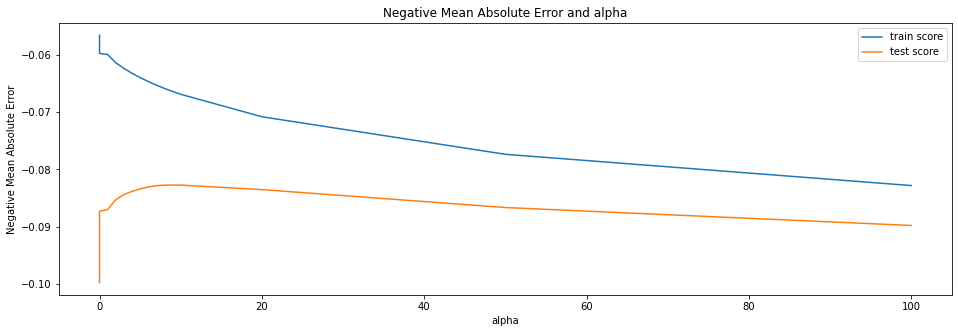

In [178]:
RidgeCVResults['param_alpha'] = RidgeCVResults['param_alpha'].astype('int32')
# plotting mean for train and test score with alpha 
RidgeCVResults['param_alpha'] = RidgeCVResults['param_alpha']
plt.figure(figsize=(16,5))
plt.plot(RidgeCVResults['param_alpha'], RidgeCVResults['mean_train_score'])
plt.plot(RidgeCVResults['param_alpha'], RidgeCVResults['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [182]:
alpha = int(RidgeModelCV.best_params_.get('alpha'))
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)

Ridge(alpha=9)

In [187]:
y_train_pred = ridge.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))

y_test_pred = ridge.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.9363363209462434
0.9238197727688209


In [188]:
metrics.mean_squared_error(y_test, ridge.predict(X_test))

0.012813511059446775

## LASSO REGRESSION

In [189]:
lasso = Lasso()
params = {'alpha': [0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.001, 0.002, 0.003, 0.004, 0.005, 0.01]}

folds = 5
LassoModelCV = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)             

LassoModelCV.fit(X_train, y_train) 

Fitting 5 folds for each of 11 candidates, totalling 55 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.0002, 0.0003, 0.0004, 0.0005,
                                   0.001, 0.002, 0.003, 0.004, 0.005, 0.01]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [190]:
print(LassoModelCV.best_params_)
print(LassoModelCV.best_score_)

{'alpha': 0.0004}
-0.08361564012192255


In [191]:
LassoModelCVResults = pd.DataFrame(LassoModelCV.cv_results_)
LassoModelCVResults[['param_alpha', 'mean_train_score', 'mean_test_score', 'rank_test_score']].sort_values(by = ['rank_test_score'])

,param_alpha,mean_train_score,mean_test_score,rank_test_score
3,0.0004,-0.065901,-0.083616,1
4,0.0005,-0.067498,-0.083697,2
2,0.0003,-0.064170,-0.083901,3
1,0.0002,-0.061992,-0.084162,4
5,0.001,-0.073521,-0.085668,5
0,0.0001,-0.059611,-0.087203,6
6,0.002,-0.081918,-0.090014,7
7,0.003,-0.088067,-0.094150,8
8,0.004,-0.093115,-0.097988,9
9,0.005,-0.096684,-0.100878,10


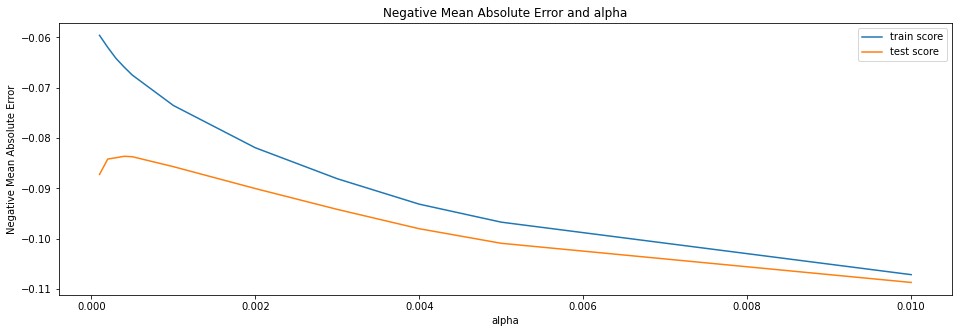

In [193]:
LassoModelCVResults['param_alpha'] = LassoModelCVResults['param_alpha'].astype('float32')

plt.figure(figsize=(16,5))
plt.plot(LassoModelCVResults['param_alpha'], LassoModelCVResults['mean_train_score'])
plt.plot(LassoModelCVResults['param_alpha'], LassoModelCVResults['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [194]:
alpha = LassoModelCV.best_params_.get('alpha')
lasso = Lasso(alpha=alpha)
lasso.fit(X_train, y_train)

Lasso(alpha=0.0004)

In [195]:
y_train_pred = lasso.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))

y_test_pred = lasso.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.9356048305545931
0.9239806055211923


In [196]:
metrics.mean_squared_error(y_test, lasso.predict(X_test))

0.012786458997171112

## Conclusion :


__From the above analysis we can reach the following conclusion about different regularization methods:__

__Regularization is used to reduce the dependence on any particular independent variable by adding the penalty term to the Loss function. This term prevents the coefficients of the independent variables to take extreme values.__

__Ridge Regression adds L2 regularization penalty term to loss function. This term reduces the coefficients but does not make them 0 and thus doesn’t eliminate any independent variable completely. It can be used to measure the impact of the different independent variables.__

__Lasso Regression adds L1 regularization penalty term to loss function. This term reduces the coefficients as well as makes them 0 thus effectively eliminate the corresponding independent variable completely. It can be used for feature selection etc.__


## THE END !